layer number?2
train acc, test acc | 0.06045, 0.0621
train acc, test acc | 0.9032166666666667, 0.9064
train acc, test acc | 0.9240833333333334, 0.9271
train acc, test acc | 0.9356, 0.9384
train acc, test acc | 0.9442333333333334, 0.9426
train acc, test acc | 0.9503333333333334, 0.9473
train acc, test acc | 0.9548333333333333, 0.9552
train acc, test acc | 0.95875, 0.9549
train acc, test acc | 0.96245, 0.9593
train acc, test acc | 0.9662166666666666, 0.9619
train acc, test acc | 0.9683833333333334, 0.964
train acc, test acc | 0.9703333333333334, 0.9647
train acc, test acc | 0.9719333333333333, 0.9673
train acc, test acc | 0.9737666666666667, 0.9673
train acc, test acc | 0.9764833333333334, 0.9711
train acc, test acc | 0.9774333333333334, 0.9709
train acc, test acc | 0.9787, 0.9702


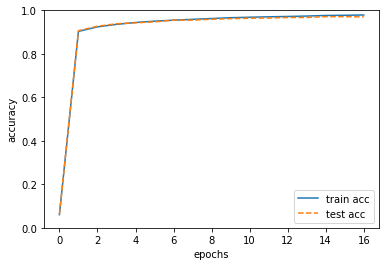

In [10]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from multilayer import Net

(x_train,t_train), (x_test, t_test) = load_mnist(normalize=True,one_hot_label=True)
network = Net(input_size=784,hidden_size=50,output_size=10)
i_num = 10000
train_size = x_train.shape[0]
batch_size = 100
lr = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []
# 1 에폭당 반복 수
iter_per_epoch = max(train_size / batch_size,1)

for i in range(i_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)
    
    for key in network.params.keys():
        network.params[key] -= lr*grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
